<head>
    <img src="https://www.smu.edu/~/media/Site/DevelopmentExternalAffairs/MarketingCommunications/Logos/smu/SMULogoRrgb" alt="SMU_logo" style="width:auto;height:100px;float:left; padding:5px"/>
     <img src="http://content.sportslogos.net/logos/7/1007/full/4710.gif" alt="NFL_logo" style="width:auto;height:100px;float:right; padding:5px"/>
<h1 style="text-align:center; font:40px Verdana; font-weight:bold">DS 7331 - Data Mining (Lab 1)</h1>
</head>

## The Data Set
Developed by statistical researchers from Carnegie Mellon University, <a href="https://github.com/maksimhorowitz/nflscrapR">nflscrapR</a> is designed to scrap and parse data from the NFL API. They have uploaded the NFL play-by-play data to <a href="https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016#NFL%20Play%20by%20Play%202009-2018%20(v5).csv">kaggle.com</a> as a csv file for the general public to use in order to grow the football statistics community.
<br><br>
We selected this data set since the scarcity of reliable NFL data in previous years has limited the field of sport analytics to dive deeper into the NFL. While the data set doesn't serve a singular purpose, we plan to use this data set in an effort to attempt to predict whether the play will be a first down. With the development of a Generalized Linear Model, we can produce a model to predict whether a play will result in the following:

>Touchdown
<br>
Field Goal

In [40]:
#import Pandas, Statistics, MatPlotLib, NumPy, and Seaborn
import pandas as pd
import statistics
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<h3>Going Deep into the Data</h3>
A look into the data set reveals it contains 255 columns and 449,370 rows. The different data types are floats, integers, and objects. The data is a detailed play-by-play breakdown spanning from the beginning of the 2009 season and the end of Week 15 of the 2018 season.

In [41]:
#import data set into data frame under alias NFL
NFL = pd.read_csv("NFL.csv")
NFL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449371 entries, 0 to 449370
Columns: 255 entries, play_id to defensive_extra_point_conv
dtypes: float64(135), int64(18), object(102)
memory usage: 874.2+ MB


The data set contains 255 columns and 449,370 rows. Each row represents a play that was executed in the NFL between 2009 and 2018 (excludes Week 16, Week 17, and postseason of 2018 season). 
<br><br>
The following table describes the variables included in the data set as presented by the authors.

<div style="height:200px;overflow:auto;">
<table>
  <tr>
  <th>Variables</th>    <th>Data Type</th>    <th>Description</th>
  <th></th>
  <th>Variables</th>    <th>Data Type</th>    <th>Description</th>
  </tr><tr>
    <td>play_id</td>      <td>ID</td>      <td>Assigned ID number to play in the data set</td>
    <td></td>
    <td>game_id</td>      <td>ID</td>      <td>Assigned ID number to game in the data set</td>
  </tr><tr>
    <td>home_team</td>      <td>String</td>      <td>Abbreviated name of home team</td>
    <td></td>
    <td>away_team</td>      <td>String</td>      <td>Abbreviated name of the away team</td>
  </tr><tr>
    <td>posteam</td>      <td>String</td>      <td>Abbreviated team name with possession</td>
    <td></td>
    <td>posteam_type</td>      <td>String</td>      <td>Identifies team with possession as home/away</td>
  </tr><tr>
    <td>defteam</td>      <td>String</td>      <td>Abbreviated name of team on defensee</td>
    <td></td>
    <td>side_of_field</td>      <td>String</td>      <td>Abbreviated name of team's side of the field where play begins</td>
  </tr><tr>
    <td>yardline_100</td>      <td>String</td>      <td>Yardline number where the play begins </td>
    <td></td>
    <td>game_date</td>      <td>Date</td>      <td>Date of game</td>
  </tr><tr>
    <td>quarter_seconds_remaining</td>      <td>Integer</td>      <td>Seconds remaining in the quarter</td>
    <td></td>
    <td>half_seconds_remaining</td>      <td>Integer</td>      <td>seconds remaining in the half</td>
  </tr><tr>
    <td>game_seconds_remaining</td>      <td>Integer</td>      <td>seconds remaining in the game</td>
    <td></td>
    <td>game_half</td>      <td>String</td>      <td>Indicates which half the game is currently at when the play begins</td>
  </tr><tr>
    <td>quarter_end</td>      <td>Integer</td>      <td>Indicates whether it is the last play in the quarter</td>
    <td></td>
    <td>drive</td>      <td>Integer</td>      <td>Identifies the drive number</td>
  </tr><tr>
    <td>sp</td>      <td>Integer</td>      <td>Identifies scoring plays</td>
    <td></td>
    <td>qtr</td>      <td>Integer</td>      <td>Identifies the quarter</td>
  </tr><tr>
    <td>down</td>      <td>String</td>      <td>Identifies the current down</td>
    <td></td>
    <td>goal_to_go</td>      <td>String</td>      <td>Idenfities plays in which the yards to go are to the goal line</td>
  </tr><tr>
    <td>time</td>      <td>Date</td>      <td>Running game time</td>
    <td></td>
    <td>yrdln</td>      <td>String</td>      <td>Yard line in which the play began</td>
  </tr><tr>
    <td>ydstogo</td>      <td>Integer</td>      <td>Yards left to go on downs</td>
    <td></td>
    <td>ydsnet</td>      <td>Integer</td>      <td>Net yards gained/lost in the play</td>
  </tr><tr>
    <td>desc</td>      <td>String</td>      <td>Description of the play</td>
    <td></td>
    <td>play_type</td>      <td>String</td>      <td>Type of play</td>
  </tr><tr>
    <td>yards_gained</td>      <td>Integer</td>      <td>Yards gained in the play</td>
    <td></td>
    <td>shotgun</td>      <td>Integer</td>      <td>Identifies if the play is run out of the shotgun</td>
  </tr><tr>
    <td>no_huddle</td>      <td>Integer</td>      <td>Identifies if the play started without a huddle</td>
    <td></td>
    <td>qb_dropback</td>      <td>String</td>      <td>Identifies if the QB dropped back in the play</td>
  </tr><tr>
    <td>qb_kneel</td>      <td>Integer</td>      <td>Identifies is the QB took a knee in the play</td>
    <td></td>
    <td>qb_spike</td>      <td>Integer</td>      <td>Identifies if the QB spiked the ball in the play</td>
  </tr><tr>
    <td>qb_scramble</td>      <td>Integer</td>      <td>Identifies if the QB scrambled out of the pocket</td>
    <td></td>
    <td>pass_length</td>      <td>String</td>      <td>Length of the pass in yards and yards after catch</td>
  </tr><tr>
    <td>pass_location</td>      <td>String</td>      <td>Location of where the ball was thrown to</td>
    <td></td>
    <td>air_yards</td>      <td>String</td>      <td>Yards ball travels in air during pass</td>
  </tr><tr>
    <td>yards_after_catch</td>      <td>String</td>      <td>Yards gained/lost after the pass is caught</td>
    <td></td>
    <td>run_location</td>      <td>String</td>      <td>Location of where the run headed</td>
  </tr><tr>
    <td>run_gap</td>      <td>String</td>      <td>Identifies which gap the run went through</td>
    <td></td>
    <td>field_goal_result</td>      <td>String</td>      <td>Identifies the outcome of a field goal attempt</td>
  </tr><tr>
    <td>kick_distance</td>      <td>String</td>      <td>Distance of a kick in yards</td>
    <td></td>
    <td>extra_point_result</td>      <td>String</td>      <td>Identifies the result of an extra point attempt</td>
  </tr><tr>
    <td>two_point_conv_result</td>      <td>String</td>      <td>Identifies the result of a two-point conversion attempt</td>
    <td></td>
    <td>home_timeouts_remaining</td>      <td>Integer</td>      <td>The number of timeouts the home team has remaining at the time of the play</td>
  </tr><tr>
    <td>away_timeouts_remaining</td>      <td>Integer</td>      <td>The number of timeouts the away team has remaining at the time of the play</td>
    <td></td>
    <td>timeout</td>      <td>String</td>      <td>Identifies if a timeout was called</td>
  </tr><tr>
    <td>timeout_team</td>      <td>String</td>      <td>Identifies which team called the timeout</td>
    <td></td>
    <td>td_team</td>      <td>String</td>      <td>Identifies which team performed the touchdown</td>
  </tr><tr>
    <td>posteam_timeouts_remaining</td>      <td>String</td>      <td>Number of timeouts the team with possession has remaining</td>
    <td></td>
    <td>defteam_timeouts_remaining</td>      <td>String</td>      <td>Number of timeouts the team in defense has remaining</td>
  </tr><tr>
    <td>total_home_score</td>      <td>Integer</td>      <td>Score of the home team</td>
    <td></td>
    <td>total_away_score</td>      <td>Integer</td>      <td>Score of the away team</td>
  </tr><tr>
    <td>posteam_score</td>      <td>String</td>      <td>Score of the team with possession</td>
    <td></td>
    <td>defteam_score</td>      <td>String</td>      <td>Score of the team in defense</td>
  </tr><tr>
    <td>score_differential</td>      <td>String</td>      <td>Score difference between both teams</td>
    <td></td>
    <td>posteam_score_post</td>      <td>String</td>      <td></td>
  </tr><tr>
    <td>defteam_score_post</td>      <td>String</td>      <td></td>
    <td></td>
    <td>score_differential_post</td>      <td>String</td>      <td></td>
  </tr><tr>
    <td>no_score_prob</td>      <td>Float</td>      <td>Probability of no score ocurring in the play</td>
    <td></td>
    <td>opp_fg_prob</td>      <td>Float</td>      <td>Probability of an unsuccessful field goal</td>
  </tr><tr>
    <td>opp_safety_prob</td>      <td>Float</td>      <td>Probability of a safety not occurring</td>
    <td></td>
    <td>opp_td_prob</td>      <td>Float</td>      <td>Probability of a touchdown occurring</td>
  </tr><tr>
    <td>fg_prob</td>      <td>Float</td>      <td>Probability of a successful field goal</td>
    <td></td>
    <td>safety_prob</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>td_prob</td>      <td>Float</td>      <td>Probability of a touchdown</td>
    <td></td>
    <td>extra_point_prob</td>      <td>Float</td>      <td>Probability of an extra point</td>
  </tr><tr>
    <td>two_point_conversion_prob</td>      <td>Float</td>      <td>Probability of a two-point conversion</td>
    <td></td>
    <td>ep</td>      <td>String</td>      <td>Expected Points</td>
  </tr><tr>
    <td>epa</td>      <td>String</td>      <td>Expected Points Added</td>
    <td></td>
    <td>total_home_epa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_away_epa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_home_rush_epa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_away_rush_epa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_home_pass_epa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_away_pass_epa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>air_epa</td>      <td>String</td>      <td></td>
  </tr><tr>
    <td>yac_epa</td>      <td>String</td>      <td></td>
    <td></td>
    <td>comp_air_epa</td>      <td>String</td>      <td></td>
  </tr><tr>
    <td>comp_yac_epa</td>      <td>String</td>      <td></td>
    <td></td>
    <td>total_home_comp_air_epa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_away_comp_air_epa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_home_comp_yac_epa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_away_comp_yac_epa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_home_raw_air_epa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_away_raw_air_epa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_home_raw_yac_epa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_away_raw_yac_epa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>wp</td>      <td>String</td>      <td>Win probability based on play</td>
  </tr><tr>
    <td>def_wp</td>      <td>String</td>      <td>Defense win probability</td>
    <td></td>
    <td>home_wp</td>      <td>String</td>      <td>Home team win probability</td>
  </tr><tr>
    <td>away_wp</td>      <td>String</td>      <td>Away team win probability</td>
    <td></td>
    <td>wpa</td>      <td>String</td>      <td>Win Probability Added</td>
  </tr><tr>
    <td>home_wp_post</td>      <td>String</td>      <td></td>
    <td></td>
    <td>away_wp_post</td>      <td>String</td>      <td></td>
  </tr><tr>
    <td>total_home_rush_wpa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_away_rush_wpa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_home_pass_wpa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_away_pass_wpa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>air_wpa</td>      <td>String</td>      <td></td>
    <td></td>
    <td>yac_wpa</td>      <td>String</td>      <td></td>
  </tr><tr>
    <td>comp_air_wpa</td>      <td>String</td>      <td></td>
    <td></td>
    <td>comp_yac_wpa</td>      <td>String</td>      <td></td>
  </tr><tr>
    <td>total_home_comp_air_wpa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_away_comp_air_wpa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_home_comp_yac_wpa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_away_comp_yac_wpa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_home_raw_air_wpa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_away_raw_air_wpa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_home_raw_yac_wpa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_away_raw_yac_wpa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>punt_blocked</td>      <td>String</td>      <td>Indicates if a punt was blocked</td>
    <td></td>
    <td>first_down_rush</td>      <td>String</td>      <td>Indicates if a rushing first down occurred</td>
  </tr><tr>
    <td>first_down_pass</td>      <td>String</td>      <td>Indicates if a passing first down occurred</td>
    <td></td>
    <td>first_down_penalty</td>      <td>String</td>      <td>Indicates if a penalty resulted in a first down</td>
  </tr><tr>
    <td>third_down_converted</td>      <td>String</td>      <td>Indicates if a third down was converted</td>
    <td></td>
    <td>third_down_failed</td>      <td>String</td>      <td>Indicates if a third down failed</td>
  </tr><tr>
    <td>fourth_down_converted</td>      <td>String</td>      <td>Indicates if a fourth down was converted</td>
    <td></td>
    <td>fourth_down_failed</td>      <td>String</td>      <td>Indicates if a fourth down was turned over on downs</td>
  </tr><tr>
    <td>incomplete_pass</td>      <td>String</td>      <td>Indicates if the pass was incomplete</td>
    <td></td>
    <td>interception</td>      <td>String</td>      <td>Indicates if an interception occurred</td>
  </tr><tr>
    <td>punt_inside_twenty</td>      <td>String</td>      <td>Indicates if punt landed between the goal line and the twnety yard line</td>
    <td></td>
    <td>punt_in_endzone</td>      <td>String</td>      <td>Indicates if the punt landed in the endzone</td>
  </tr><tr>
    <td>punt_out_of_bounds</td>      <td>String</td>      <td>Indicates if the punt landed out of bounds</td>
    <td></td>
    <td>punt_downed</td>      <td>String</td>      <td>Indicates if the punt was downed</td>
  </tr><tr>
    <td>punt_fair_catch</td>      <td>String</td>      <td>Indicates if the punt was a fair catch</td>
    <td></td>
    <td>kickoff_inside_twenty</td>      <td>String</td>      <td>Indicates if the kickoff landed between the twnety yard line and the goal line</td>
  </tr><tr>
    <td>kickoff_in_endzone</td>      <td>String</td>      <td>Indicates if the kickoff landed in the endzone</td>
    <td></td>
    <td>kickoff_out_of_bounds</td>      <td>String</td>      <td>Indicates if the kickoff landed out of bounds</td>
  </tr><tr>
    <td>kickoff_downed</td>      <td>String</td>      <td>Indicates if the kickoff was downed</td>
    <td></td>
    <td>kickoff_fair_catch</td>      <td>String</td>      <td>Indicates if the kickoff was ruled a fair catch</td>
  </tr><tr>
    <td>fumble_forced</td>      <td>String</td>      <td>Identifies if a fumble was forced</td>
    <td></td>
    <td>fumble_not_forced</td>      <td>String</td>      <td>Identifies if the fumble was not forced</td>
  </tr><tr>
    <td>fumble_out_of_bounds</td>      <td>String</td>      <td>Identifies if the fumble bounced out of bounds</td>
    <td></td>
    <td>solo_tackle</td>      <td>String</td>      <td>Indicates if a solo tackle was made</td>
  </tr><tr>
    <td>safety</td>      <td>String</td>      <td>Indicates if a safety resulted in the play</td>
    <td></td>
    <td>penalty</td>      <td>String</td>      <td>Indicates if a penalty occurred in the play</td>
  </tr><tr>
    <td>tackled_for_loss</td>      <td>String</td>      <td>Indicates if the play resulted in a tackle for loss</td>
    <td></td>
    <td>fumble_lost</td>      <td>String</td>      <td>Indicates if a fumble was lost in the play</td>
  </tr><tr>
    <td>own_kickoff_recovery</td>      <td>String</td>      <td>Identifies if the kicking team recovered their own kickoff</td>
    <td></td>
    <td>own_kickoff_recovery_td</td>      <td>String</td>      <td>Identifies if the kicking team recovered their own kick</td>
  </tr><tr>
    <td>qb_hit</td>      <td>String</td>      <td>Indicates if the quarterback was hit in the play</td>
    <td></td>
    <td>rush_attempt</td>      <td>String</td>      <td>Indicates if the play was a rush attempt</td>
  </tr><tr>
    <td>pass_attempt</td>      <td>String</td>      <td>Indicates if the play was a pass attempt</td>
    <td></td>
    <td>sack</td>      <td>String</td>      <td>Indicates if a sack occurred in the play</td>
  </tr><tr>
    <td>touchdown</td>      <td>String</td>      <td>Indicates if the play resulted in a touchdown</td>
    <td></td>
    <td>pass_touchdown</td>      <td>String</td>      <td>Indicates if the touchdown play was a pass</td>
  </tr><tr>
    <td>rush_touchdown</td>      <td>String</td>      <td>Indicates if the touchdown play was a rush</td>
    <td></td>
    <td>return_touchdown</td>      <td>String</td>      <td>Indicates if the touchdown was a kickoff/punt return</td>
  </tr><tr>
    <td>extra_point_attempt</td>      <td>String</td>      <td>Identifies if the play was an extra point attempt</td>
    <td></td>
    <td>two_point_attempt</td>      <td>String</td>      <td>Identifies if the play was a two-point conversion</td>
  </tr><tr>
    <td>field_goal_attempt</td>      <td>String</td>      <td>Identifies if the play was a field goal attempt</td>
    <td></td>
    <td>kickoff_attempt</td>      <td>String</td>      <td>Identifies if the play was a kickoff attempt</td>
  </tr><tr>
    <td>punt_attempt</td>      <td>String</td>      <td>Identifies if the play was a punt attempt</td>
    <td></td>
    <td>fumble</td>      <td>String</td>      <td>Identifies if the play </td>
  </tr><tr>
    <td>complete_pass</td>      <td>String</td>      <td>Identifies if the pass was completed</td>
    <td></td>
    <td>assist_tackle</td>      <td>String</td>      <td>Identifies if an assisted tackle occurred in the play</td>
  </tr><tr>
    <td>lateral_reception</td>      <td>String</td>      <td>Identifies if there was a letral reception in the play</td>
    <td></td>
    <td>lateral_rush</td>      <td>String</td>      <td>Identifies if there was a lateral in the run play</td>
  </tr><tr>
    <td>lateral_return</td>      <td>String</td>      <td>Identifies if there was a lateral in the return play</td>
    <td></td>
    <td>lateral_recovery</td>      <td>String</td>      <td>Identifies is there was a lateral in the recovery play</td>
  </tr><tr>
    <td>passer_player_id</td>      <td>String</td>      <td>ID of player who threw pass</td>
    <td></td>
    <td>passer_player_name</td>      <td>String</td>      <td>Name of player who thre pass</td>
  </tr><tr>
    <td>receiver_player_id</td>      <td>String</td>      <td>ID of player who received pass</td>
    <td></td>
    <td>receiver_player_name</td>      <td>String</td>      <td>Name of player who received pass</td>
  </tr><tr>
    <td>rusher_player_id</td>      <td>String</td>      <td>ID of player who rushed the ball</td>
    <td></td>
    <td>rusher_player_name</td>      <td>String</td>      <td>Name of player who rushed the ball</td>
  </tr><tr>
    <td>lateral_receiver_player_id</td>      <td>String</td>      <td>ID of player who received lateral pass</td>
    <td></td>
    <td>lateral_receiver_player_name</td>      <td>String</td>      <td>Name of player who received lateral pass</td>
  </tr><tr>
    <td>lateral_rusher_player_name</td>      <td>String</td>      <td>Name of player who rushed lateral pitch</td>
    <td></td>
    <td>lateral_rusher_player_id</td>      <td>String</td>      <td>ID of player who rushed lateral pitch</td>
   </tr><tr>
    <td>lateral_sack_player_id</td>      <td>String</td>      <td>ID of player who sacked lateral passer</td>
    <td></td>
    <td>lateral_sack_player_name</td>      <td>String</td>      <td>Name of player who sacked lateral passer</td>
  </tr><tr>
    <td>interception_player_id</td>      <td>String</td>      <td>ID of player who intercepted pass</td>
    <td></td>
    <td>interception_player_name</td>      <td>String</td>      <td>Name of player who intercepted pass</td>
  </tr><tr>
    <td>lateral_interception_player_id</td>      <td>String</td>      <td>ID of player who intercepted lateral</td>
    <td></td>
    <td>lateral_interception_player_name</td>      <td>String</td>      <td>Name of player who intercepted lateral</td>
  </tr><tr>
    <td>punt_returner_player_id</td>      <td>String</td>      <td>ID of player returning punt</td>
    <td></td>
    <td>punt_returner_player_name</td>      <td>String</td>      <td>Name of player returning punt</td>
  </tr><tr>
    <td>lateral_punt_returner_player_id</td>      <td>String</td>      <td>ID of player who receives lateral during punt</td>
    <td></td>
    <td>lateral_punt_returner_player_name</td>      <td>String</td>      <td>Name of player who received lateral during punt</td>
  </tr><tr>
    <td>kickoff_returner_player_name</td>      <td>String</td>      <td>Name of player who returns kick during kickoff</td>
    <td></td>
    <td>kickoff_returner_player_id</td>      <td>String</td>      <td>ID of player who returns kick during kickoff</td>
  </tr><tr>
    <td>lateral_kickoff_returner_player_id</td>      <td>String</td>      <td>ID of player who receives lateral during kickoff</td>
    <td></td>
    <td>lateral_kickoff_returner_player_name</td>      <td>String</td>      <td>Name of player who receives lateral during kickoff</td>
  </tr><tr>
    <td>punter_player_id</td>      <td>String</td>      <td>ID of punter</td>
    <td></td>
    <td>punter_player_name</td>      <td>String</td>      <td>Name of punter</td>
  </tr><tr>
    <td>kicker_player_name</td>      <td>String</td>      <td>Name of kicker</td>
    <td></td>
    <td>kicker_player_id</td>      <td>String</td>      <td>ID of kicker</td>
  </tr><tr>
    <td>own_kickoff_recovery_player_id</td>      <td>String</td>      <td>ID of player who recovers kickoff from own team</td>
    <td></td>
    <td>own_kickoff_recovery_player_name</td>      <td>String</td>      <td>Name of player who recovers kickoff from own team</td>
  </tr><tr>
    <td>blocked_player_id</td>      <td>String</td>      <td>ID of player who blocked the kick</td>
    <td></td>
    <td>blocked_player_name</td>      <td>String</td>      <td>Name of player who blocked the kick</td>
  </tr><tr>
    <td>tackle_for_loss_1_player_id</td>      <td>String</td>      <td>ID of player credited with tackle for loss 1</td>
    <td></td>
    <td>tackle_for_loss_1_player_name</td>      <td>String</td>      <td>Name of player credited with tackle for loss 1</td>
  </tr><tr>
    <td>tackle_for_loss_2_player_id</td>      <td>String</td>      <td>ID of player credited with tackle for loss 2</td>
    <td></td>
    <td>tackle_for_loss_2_player_name</td>      <td>String</td>      <td>Name of player credited with tackle for loss 2</td>
  </tr><tr>
    <td>qb_hit_1_player_id</td>      <td>String</td>      <td>ID of player credited with QB hit 1</td>
    <td></td>
    <td>qb_hit_1_player_name</td>      <td>String</td>      <td>Name of player credited with QB hit 1</td>
  </tr><tr>
    <td>qb_hit_2_player_id</td>      <td>String</td>      <td>ID of player credited with QB hit 2</td>
    <td></td>
    <td>qb_hit_2_player_name</td>      <td>String</td>      <td>Name of player credited with QB hit 2</td>
  </tr><tr>
    <td>forced_fumble_player_1_team</td>      <td>String</td>      <td>Team of player 1 who forced fumble</td>
    <td></td>
    <td>forced_fumble_player_1_player_id</td>      <td>String</td>      <td>ID of player 1 who forced fumble</td>
  </tr><tr>
    <td>forced_fumble_player_1_player_name</td>      <td>String</td>      <td>Name of player 1 who forced fumble</td>
    <td></td>
    <td>forced_fumble_player_2_team</td>      <td>String</td>      <td>Team of player 2 who forced fumble</td>
  </tr><tr>
    <td>forced_fumble_player_2_player_id</td>      <td>String</td>      <td>ID of player 2 who forced fumble</td>
    <td></td>
    <td>forced_fumble_player_2_player_name</td>      <td>String</td>      <td>Name of player 2 who forced fumble</td>
  </tr><tr>
    <td>solo_tackle_1_team</td>      <td>String</td>      <td>Team of player responsible for solo tackle 1</td>
    <td></td>
    <td>solo_tackle_2_team</td>      <td>String</td>      <td>Team of player responsible for solo tackle 2</td>
  </tr><tr>
    <td>solo_tackle_1_player_id</td>      <td>String</td>      <td>ID of player responsible for solo tackle 1</td>
    <td></td>
    <td>solo_tackle_2_player_id</td>      <td>String</td>      <td>ID of player responsible for solo tackle 2</td>
  </tr><tr>
    <td>solo_tackle_1_player_name</td>      <td>String</td>      <td>Name of player responsible for solo tackle 1</td>
    <td></td>
    <td>solo_tackle_2_player_name</td>      <td>String</td>      <td>Name of player responsible for solo tackle 2</td>
  </tr><tr>
    <td>assist_tackle_1_player_id</td>      <td>String</td>      <td>ID of player 1 in assist tackle</td>
    <td></td>
    <td>assist_tackle_1_player_name</td>      <td>String</td>      <td>Name of player 1 in assist tackle</td>
  </tr><tr>
    <td>assist_tackle_1_team_</td>      <td>String</td>      <td>Team of player 1 in assist tackle</td>
    <td></td>
    <td>assist_tackle_2_player_id</td>      <td>String</td>      <td>ID of player 2 in assist tackle</td>
  </tr><tr>
    <td>assist_tackle_2_player_name</td>      <td>String</td>      <td>Name of player 2 in assist tackle</td>
    <td></td>
    <td>assist_tackle_2_team</td>      <td>String</td>      <td>Team of player 2 in assist tackle</td>
  </tr><tr>
    <td>assist_tackle_3_player_id</td>      <td>String</td>      <td>ID of player 3 in assist tackle</td>
    <td></td>
    <td>assist_tackle_3_player_name</td>      <td>String</td>      <td>Name of player 3 in assist tackle</td>
  </tr><tr>
    <td>assist_tackle_3_team_</td>      <td>String</td>      <td>Team of player 3 in assist tackle</td>
    <td></td>
    <td>assist_tackle_4_player_id</td>      <td>String</td>      <td>ID of player 4 in assist tackle</td>
  </tr><tr>
    <td>assist_tackle_4_player_name</td>      <td>String</td>      <td>Name of player 4 in assist tackle</td>
    <td></td>
    <td>assist_tackle_4_team</td>      <td>String</td>      <td>Team of player 4 in assist tackle</td>
  </tr><tr>
    <td>pass_defense_1_player_id</td>      <td>String</td>      <td>ID of defensive player 1 who broke up pass</td>
    <td></td>
    <td>pass_defense_1_player_name</td>      <td>String</td>      <td>Name of defensive player 1 who broke up pass</td>
  </tr><tr>
    <td>pass_defense_2_player_id</td>      <td>String</td>      <td>ID of defensive player 2 who broke up pass</td>
    <td></td>
    <td>pass_defense_2_player_name</td>      <td>String</td>      <td>Name of defensive player 2 who broke up pass</td>
  </tr><tr>
    <td>fumbled_1_team</td>      <td>String</td>      <td>Team that fumbled 1</td>
    <td></td>
    <td>fumbled_1_player_id</td>      <td>String</td>      <td>ID of player who fumbled 1</td>
  </tr><tr>
    <td>fumbled_1_player_name</td>      <td>String</td>      <td>Name of player who fumbled 1</td>
    <td></td>
    <td>fumbled_2_team</td>      <td>String</td>      <td>Team that fumbled 2</td>
  </tr><tr>
    <td>fumbled_2_player_id</td>      <td>String</td>      <td>ID of player who fumbled 2</td>
    <td></td>
    <td>fumbled_2_player_name</td>      <td>String</td>      <td>Name of player who fumbled 2</td>
  </tr><tr>
    <td>fumble_recovery_1_team</td>      <td>String</td>      <td>Team who recovered fumble 1</td>
    <td></td>
    <td>fumble_recovery_1_yards</td>      <td>String</td>      <td>Yards gained/lost as a result of recovering fumble 1</td>
  </tr><tr>
    <td>fumble_recovery_1_player_id</td>      <td>String</td>      <td>ID of player who recovered fumble 1</td>
    <td></td>
    <td>fumble_recovery_1_player_name</td>      <td>String</td>      <td>Name of player who recovered fumble 1</td>
  </tr><tr>
    <td>fumble_recovery_2_team</td>      <td>String</td>      <td>Team who recovered fumble 2</td>
    <td></td>
    <td>fumble_recovery_2_yards</td>      <td>String</td>      <td>Yards gained/lost as a result of recovering fumble 2</td>
  </tr><tr>
    <td>fumble_recovery_2_player_id</td>      <td>String</td>      <td>ID of player who recovered fumble 2</td>
    <td></td>
    <td>fumble_recovery_2_player_name</td>      <td>String</td>      <td>Name of player who recovered fumble2</td>
  </tr><tr>
    <td>return_team</td>      <td>String</td>      <td>Team returning the ball after a kickoff/punt</td>
    <td></td>
    <td>return_yards</td>      <td>Integer</td>      <td>Amount of yards gained in a kickoff/punt return</td>
  </tr><tr>
    <td>penalty_team</td>      <td>String</td>      <td>Team that committed the penalty</td>
    <td></td>
    <td>penalty_player_id</td>      <td>String</td>      <td>ID of player who committed the penalty</td>
  </tr><tr>
    <td>penalty_player_name</td>      <td>String</td>      <td>Name of player who committed the penalty</td>
    <td></td>
    <td>penalty_yards</td>      <td>String</td>      <td>Yards penalized as a result of a penalty</td>
  </tr><tr>
    <td>replay_or_challenge</td>      <td>Integer</td>      <td>Identifies if a replay or coach's challenge occurred in the play</td>
    <td></td>
    <td>replay_or_challenge_result</td>      <td>String</td>      <td>Identifies the result of the replay or coach's challenge</td>
  </tr><tr>
    <td>penalty_type</td>      <td>String</td>      <td>Identifies the type of penalty charged in the play</td>
    <td></td>
    <td>defensive_two_point_attempt</td>      <td>String</td>      <td>Indicates if the play was a defensive two-point conversion</td>
  </tr><tr>
    <td>defensive_two_point_conv</td>      <td>String</td>      <td>Indicates if the defense two-point conversion was successful</td>
    <td></td>
    <td>defensive_extra_point_attempt</td>      <td>String</td>      <td>Indicates if the play was a defensive extra point attempt</td>
  </tr><tr>
    <td>defensive_extra_point_conv</td>      <td>String</td>      <td>Indicates if the defense extra point was successful</td>
</tr>
</table>
</div>

Importing the data set presents a warning advising us of mixed columns in which the assigned data type may be erroneous. We address this by verifying the assigned data type corresponds with the intended use of the given variable.


The dataframe imported all of the variables as 'objects' for the columns with mixed values. Considering many of them were names of players and player IDs, the object data type would work for any further analysis.
<br><br>
While the data set is abundant with variables, there are multiple variables that are not performance output from play results. As a result, the following variables were removed in order to ensure the variables maintained were all related to on-field activities:

In [38]:
num = [42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249]
ColNames = NFL.columns[num]
NFL[ColNames].describe()

Index(['two_point_conv_result', 'lateral_receiver_player_id',
       'lateral_receiver_player_name', 'lateral_rusher_player_id',
       'lateral_rusher_player_name', 'lateral_interception_player_id',
       'lateral_interception_player_name', 'lateral_punt_returner_player_id',
       'lateral_punt_returner_player_name',
       'lateral_kickoff_returner_player_id',
       'lateral_kickoff_returner_player_name',
       'own_kickoff_recovery_player_id', 'own_kickoff_recovery_player_name',
       'blocked_player_id', 'blocked_player_name',
       'tackle_for_loss_2_player_id', 'tackle_for_loss_2_player_name',
       'forced_fumble_player_2_team', 'forced_fumble_player_2_player_id',
       'forced_fumble_player_2_player_name', 'assist_tackle_3_player_id',
       'assist_tackle_3_player_name', 'assist_tackle_3_team',
       'fumbled_2_player_id', 'fumbled_2_player_name', 'fumbled_2_team',
       'fumble_recovery_2_team', 'fumble_recovery_2_player_id',
       'fumble_recovery_2_player_name', 

,two_point_conv_result,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_interception_player_id,lateral_interception_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,lateral_kickoff_returner_player_id,...,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,fumbled_2_player_id,fumbled_2_player_name,fumbled_2_team,fumble_recovery_2_team,fumble_recovery_2_player_id,fumble_recovery_2_player_name,replay_or_challenge_result
count,696,94,94,17,17,23,23,23,23,38,...,3,3,3,38,38,38,47,47,46,812
unique,2,81,82,16,16,19,19,23,23,35,...,3,3,3,37,37,22,26,47,46,2
top,failure,00-0027891,G.Tate,00-0024242,D.Williams,00-0024360,D.Landry,00-0029681,J.Barrett,00-0027816,...,00-0021099,R.Ayodele,TB,00-0027768,M.Newhouse,TB,PHI,00-0025549,J.Edelman,upheld
freq,361,5,5,2,2,3,3,1,1,2,...,1,1,1,2,2,6,5,1,1,452


In [2]:
#Remove variables not output by player performance in the field
NFL = NFL.drop(["no_score_prob","opp_fg_prob", "opp_safety_prob", "opp_td_prob", "fg_prob", "safety_prob", 
                "two_point_conversion_prob", "ep", "epa", "total_home_epa", "total_home_rush_epa", "total_away_rush_epa",
                "total_home_pass_epa", "total_away_pass_epa", "air_epa", "yac_epa", "comp_air_epa", "comp_yac_epa",
                "total_home_comp_air_epa", "total_away_comp_air_epa", "total_home_comp_yac_epa", "total_away_comp_yac_epa",
                "total_home_raw_air_epa", "total_away_raw_air_epa", "total_home_raw_yac_epa", "total_away_raw_yac_epa",
                "wp", "def_wp", "home_wp", "away_wp", "wpa", "home_wp_post", "away_wp_post", "total_home_rush_wpa",
                "total_away_rush_wpa", "total_home_pass_wpa", "total_away_pass_wpa", "air_wpa", "yac_wpa", "comp_air_wpa",
                "comp_yac_wpa", "total_home_comp_air_wpa", "total_away_comp_air_wpa", "total_home_comp_yac_wpa",
                "total_away_comp_yac_wpa", "total_home_raw_air_wpa", "total_away_raw_air_wpa", "total_home_raw_yac_wpa",
                "total_away_raw_yac_wpa"], axis=1)

With the probability, expected points, and winning percentage variables removed, we can now take a deeper dive into the data. For starters, we are now left with 206 variables, all of which are related to potential outcomes in a given play.

In [3]:
print (NFL.dtypes)

play_id                            int64
game_id                            int64
home_team                         object
away_team                         object
posteam                           object
posteam_type                      object
defteam                           object
side_of_field                     object
yardline_100                     float64
game_date                         object
quarter_seconds_remaining        float64
half_seconds_remaining           float64
game_seconds_remaining           float64
game_half                         object
quarter_end                        int64
drive                              int64
sp                                 int64
qtr                                int64
down                             float64
goal_to_go                       float64
time                              object
yrdln                             object
ydstogo                            int64
ydsnet                             int64
desc            

In [4]:
print (NFL.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449371 entries, 0 to 449370
Columns: 206 entries, play_id to defensive_extra_point_conv
dtypes: float64(86), int64(18), object(102)
memory usage: 706.3+ MB
None


In [5]:
NFL.describe()

,play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,assist_tackle_4_team,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
count,449371.000000,4.493710e+05,436301.000000,449230.000000,449206.000000,449208.000000,449371.000000,449371.000000,449371.000000,449371.000000,...,0.0,6026.000000,47.000000,449350.000000,32618.000000,449371.000000,436497.000000,436497.000000,436497.0,436497.0
mean,2140.689606,2.013620e+09,49.800658,413.968820,810.775709,1700.697033,0.017111,12.275053,0.072090,2.577696,...,NaN,2.302688,4.808511,1.042773,8.487829,0.001823,0.000069,0.000014,0.0,0.0
std,1240.303671,2.842246e+06,25.062131,279.137304,554.712205,1053.533368,0.129684,7.124626,0.258637,1.129958,...,NaN,9.066064,14.961746,5.462253,5.323953,0.042652,0.008290,0.003708,0.0,0.0
min,35.000000,2.009091e+09,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,NaN,-34.000000,-16.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1074.000000,2.011111e+09,31.000000,152.000000,286.000000,784.000000,0.000000,6.000000,0.000000,2.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,2125.000000,2.013123e+09,52.000000,396.000000,797.000000,1800.000000,0.000000,12.000000,0.000000,3.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,3180.000000,2.016103e+09,71.000000,656.000000,1288.000000,2583.000000,0.000000,18.000000,0.000000,4.000000,...,NaN,0.000000,4.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.0,0.0
max,5706.000000,2.018122e+09,99.000000,900.000000,1800.000000,3600.000000,1.000000,38.000000,1.000000,5.000000,...,NaN,93.000000,77.000000,109.000000,66.000000,1.000000,1.000000,1.000000,0.0,0.0


In [6]:
NFL.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


### Discriptive Statistics
#### The Yard Lines
When we take a closer look into the plays and where they originate, we can see large frequencies in specific yard lines.

Text(0.5, 0, 'Yard Line')

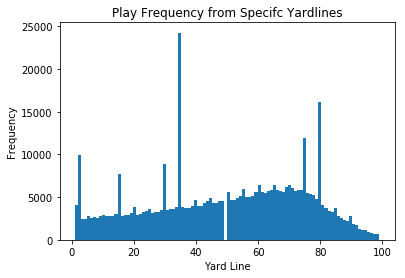

In [7]:
NFL['yardline_100'].plot(kind='hist', bins=100)
plt.title('Play Frequency from Specifc Yardlines')
plt.xlabel('Yard Line')

Considering this visual includes every single play type, it would make sense to have very high frequencies in the given areas. Certain plays such as kickoffs and extra points have predetermined starting points (unless penalties are being applied). Furthermore, considering the NFL has changed the starting point for kickoffs in recent years, it would make sense for the spike to be in multiple places.
<br><br>
So in order to address this, we can remove special team plays and only include run and pass play_type.

Text(0.5, 0, 'Yard Line')

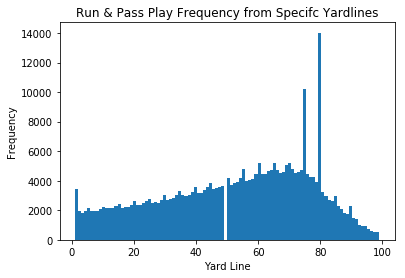

In [8]:
#Create new dataframe using only 'run' and 'pass' play_type
NFL['two_point_attempt'] = NFL['two_point_attempt'].astype(str)
Run_Pass_NFL = NFL[(NFL.play_type == 'run') | (NFL.play_type == 'pass')]

#While we may have gotten rid of the special team plays and throw away plays (QB knee, QB spike, etc.),
#we still need to keep in mind that two-point conversions start at the 2-yard line and would qualify as a 'run' or 'pass'
#play. As a result, let's go ahead and remove any two-point conversions as well in order to only get 'run' or 'pass'
#plays that are part of the drive to the endzone.
Run_Pass_NFL = Run_Pass_NFL[Run_Pass_NFL.two_point_attempt == '0.0']

#Plot new dataframe
Run_Pass_NFL['yardline_100'].plot(kind='hist', bins=100)
plt.title('Run & Pass Play Frequency from Specifc Yardlines')
plt.xlabel('Yard Line')

We see the data has been cleaned up a bit more but there is still considerable spikes in specific yardlines. This is to be expected since these yard lines are the areas where the ball is normally place in the event of a fair catch during kickoff or the ball being kicked out of bounds during kickoff.<br><br>
We see a spike towards the 0 yard line as well, which would also correspond with penalties committed in the endzone. Considering penalties are now granted as half-distance-to-the-goal and/or new set of downs, it is common to see a spike in plays near the goal line.<br><br>
While the plays and their corresponding yard line is interesting, it doesn't help us much in respect of touchdowns! Let's remove the standard plays and see where the 'money' plays are coming from.

Text(0.5, 0, 'Yard Line')

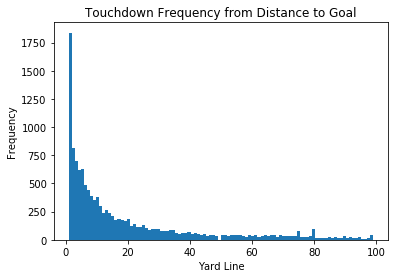

In [9]:
#Create new dataframe using only 'run' and 'pass' play_type
TD_NFL = Run_Pass_NFL[(Run_Pass_NFL.sp == 1)]

#Plot new dataframe
TD_NFL['yardline_100'].plot(kind='hist', bins=100)
plt.title('Touchdown Frequency from Distance to Goal')
plt.xlabel('Yard Line')

Based on the histogram above, we can see the relationship betwen the yard line and touchdowns that the relationship is exponential! Yet, how do the different play types vary with regards to their yard lines?

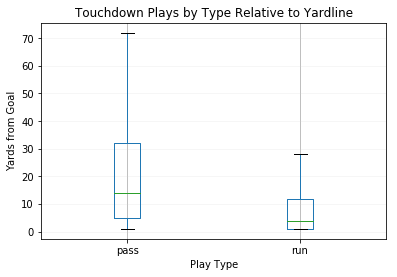

In [10]:
#Create box plot using 'yardline_100' as the y-axis and 'play_type' as class
#Outliers were not displayed in order to clearly illustrate the box plot
tdbp = TD_NFL.boxplot(column='yardline_100', by = 'play_type', showfliers=False)
#set title
tdbp.set_title('Touchdown Plays by Type Relative to Yardline')
#remove automatic title generates by pandas
plt.suptitle("")
#set y axis label
tdbp.set_ylabel('Yards from Goal')
#make grid lines light grey
tdbp.yaxis.grid(True, color='lightgrey', alpha=0.25)
#set x axis
tdbp.set_xlabel('Play Type')
#show plot
plt.show()

#### Special Teams

In [11]:
FieldGoalsAttempted = (NFL['field_goal_result']=='missed').sum() + (NFL['field_goal_result']=='made').sum() + (NFL['field_goal_result']=='blocked').sum()

In [12]:
PercentFieldGoalsMade = 100*((NFL['field_goal_result']=='made').sum()/FieldGoalsAttempted)
print(PercentFieldGoalsMade) #Here we have a percentage of all Field Goals made out of the 9813 attempted in this
                             #time period.

83.82757566493427


In [13]:
statistics.mean(NFL['kick_distance'].dropna().unique()) #This code shows us the mean of Field Goals kicked after dropping NA values

38.48780487804878

In [14]:
NFL

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
5,162,2009091000,PIT,TEN,TEN,away,PIT,TEN,98.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
6,183,2009091000,PIT,TEN,TEN,away,PIT,TEN,98.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
7,207,2009091000,PIT,TEN,TEN,away,PIT,TEN,94.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
8,228,2009091000,PIT,TEN,TEN,away,PIT,TEN,96.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
9,253,2009091000,PIT,TEN,PIT,home,TEN,TEN,43.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [15]:
NFL['kick_distance'].groupby(NFL['posteam']).describe()

,count,mean,std,min,25%,50%,75%,max
posteam,,,,,,,,
ARI,1598.0,41.341051,13.584567,7.0,33.00,42.0,51.0,77.0
ATL,1451.0,38.839421,13.942037,8.0,28.50,38.0,50.0,79.0
BAL,1608.0,41.018657,13.993363,1.0,31.00,42.0,51.0,76.0
BUF,1605.0,41.387539,13.714377,2.0,33.00,42.0,52.0,73.0
CAR,1572.0,40.701654,13.949237,6.0,33.00,40.0,51.0,76.0
CHI,1629.0,40.586863,13.617199,8.0,32.00,41.0,50.0,69.0
CIN,1653.0,40.904416,14.130036,9.0,32.00,41.0,52.0,79.0
CLE,1561.0,41.370916,12.978440,3.0,33.00,42.0,51.0,79.0
DAL,1523.0,39.771504,14.242053,7.0,30.00,40.0,50.0,78.0


#### Offense

In [16]:
NFL = NFL.replace(to_replace='SD',value='LAC') #Replacing SD with LAC so that the Chargers records/players stay together

In [17]:
RomoToWitten = NFL[(NFL["posteam"] == 'DAL')  & (NFL["desc"].str.contains("J.Witten"))
                 & (NFL["desc"].str.contains("T.Romo")) & (NFL['pass_attempt'] == 1)]
BradyToGronk = NFL[(NFL["posteam"] == 'NE')  & (NFL["desc"].str.contains("R.Gronkowski"))
                 & (NFL["desc"].str.contains("T.Brady")) & (NFL['pass_attempt'] == 1)]
RiversToGates = NFL[(NFL["posteam"] == 'LAC')  & (NFL["desc"].str.contains("A.Gates"))
                 & (NFL["desc"].str.contains("P.Rivers")) & (NFL['pass_attempt'] == 1)]
ManningToClark = NFL[(NFL["posteam"] == 'IND')  & (NFL["desc"].str.contains("D.Clark"))
                 & (NFL["desc"].str.contains("P.Manning")) & (NFL['pass_attempt'] == 1)]
TKelce = NFL[(NFL["posteam"] == 'KC')  & (NFL["desc"].str.contains("T.Kelce"))
                 & (NFL['pass_attempt'] == 1)]
GregOlsen = NFL[(NFL["desc"].str.contains("G.Olsen")) & (NFL['pass_attempt'] == 1)]

DaltonToEifert = NFL[(NFL["posteam"] == 'CIN')  & (NFL["desc"].str.contains("T.Eifert"))
                 & (NFL["desc"].str.contains("A.Dalton")) & (NFL['pass_attempt'] == 1)]
RyanGonzalez = NFL[(NFL["posteam"] == 'ATL')  & (NFL["desc"].str.contains("T.Gonzalez"))
                 & (NFL["desc"].str.contains("M.Ryan")) & (NFL['pass_attempt'] == 1)]
BigBenToMiller = NFL[(NFL["posteam"] == 'PIT')  & (NFL["desc"].str.contains("H.Miller"))
                 & (NFL["desc"].str.contains("B.Roethlisberger")) & (NFL['pass_attempt'] == 1)]

In [18]:
Mean_Romo_to_Witten = statistics.mean(RomoToWitten['yards_gained'].dropna()) #average yards gained for a play with a pass attempt to Witten
Mean_TB_to_Gronk = statistics.mean(BradyToGronk['yards_gained'].dropna()) #average yards gained for a play with a pass attempt to Gronk
Mean_Rivers_to_Gates = statistics.mean(RiversToGates['yards_gained'].dropna())
Mean_ManningToClark = statistics.mean(ManningToClark['yards_gained'].dropna())
Mean_TKelce = statistics.mean(TKelce['yards_gained'].dropna())
Mean_GregOlsen = statistics.mean(GregOlsen['yards_gained'].dropna())
Mean_DaltonToEifert = statistics.mean(DaltonToEifert['yards_gained'].dropna())
Mean_RyanGonzalez = statistics.mean(RyanGonzalez['yards_gained'].dropna())
Mean_BigBen = statistics.mean(BigBenToMiller['yards_gained'].dropna())

In [19]:
mean_yards = [Mean_Romo_to_Witten, Mean_TB_to_Gronk, Mean_Rivers_to_Gates,Mean_ManningToClark,Mean_TKelce,
             Mean_GregOlsen,Mean_DaltonToEifert,Mean_RyanGonzalez,Mean_BigBen]
y_lab = ['Romo/Witten', 'Brady/Gronk', 'Rivers/Gates','Manning/Clark','Travis Kelce', 'Greg Olsen','Dalton/Eifert',
        'Ryan/Gonzalez','BigBen/H.Miller']

In [20]:
y_pos = np.arange(len(y_lab))

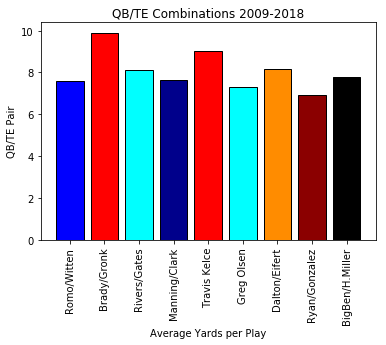

In [21]:

plt.bar(y_pos,mean_yards, color=('blue','red','cyan','darkblue','red','cyan','darkorange','darkred','black'),edgecolor='black')
plt.xticks(y_pos, y_lab, rotation=90)
plt.title('QB/TE Combinations 2009-2018')
plt.xlabel('Average Yards per Play')
plt.ylabel('QB/TE Pair')

plt.show() #Barplot of mean yards per play from QB to TE
            # We decided to include Tony Gonzalez only when he played for the Atlanta Falcons, and Greg Olsen during
            # his time with Chicago and Carolina as well as Travis Kelce in his time in Kansas City.  
            # Clearly, Tom Brady and Gronkowski have been the strongest pair this last decade.

In [22]:
NFLcorr = NFL.corr()
NFLcorr.style.background_gradient(cmap='coolwarm')

C:\Users\javie\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


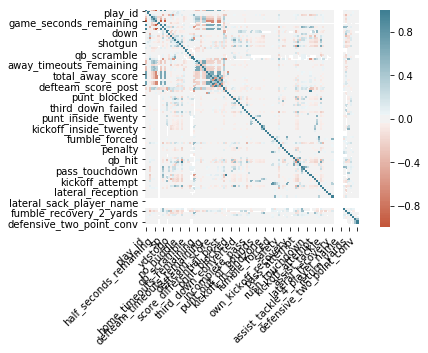

In [23]:
ax = sns.heatmap(
    NFLcorr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);